# Overlapping Null Models and Statistical Tests

In [2]:
import pandas as pd
import numpy as np

In [3]:
import pybedtools
from pybedtools import BedTool
a = pybedtools.example_bedtool('a.bed')
a.saveas('tmp/fake_enhancers.bed')

<BedTool(tmp/fake_enhancers.bed)>

In [4]:
import random
from datetime import datetime

sample_bed = BedTool('tmp/fake_enhancers.bed')
b = sample_bed.shuffle(genome='hg19', chrom=False)
print(a)
print("after shuffle:\n")
print(b) 

chr1	1	100	feature1	0	+
chr1	100	200	feature2	0	+
chr1	150	500	feature3	0	-
chr1	900	950	feature4	0	+

after shuffle:

chr15	57249874	57249973	feature1	0	+
chr2	55758249	55758349	feature2	0	+
chr10	78036142	78036492	feature3	0	-
chr22	12371372	12371422	feature4	0	+



In [5]:
encode_bed = BedTool('tmp/T-cell_ENCODE_sample.bed')
fantom_bed = BedTool('tmp/permissive_enhancers.bed')

In [6]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def std_size(bed):
    return int(round(sample_df[['size']].std()))


In [7]:
mean_size(fantom_bed)

288

In [8]:
encode_bed_sorted = encode_bed.sort()
fantom_bed_sorted = fantom_bed.sort()

In [9]:
fantom_shuffled_bed = fantom_bed.shuffle(genome='hg19', chrom=False)
fantom_shuffled_bed_sorted = fantom_shuffled_bed.sort()
encode_shuffled_bed = encode_bed.shuffle(genome='hg19', chrom=False)
encode_shuffled_bed_sorted = encode_shuffled_bed.sort()

In [10]:
empty_bed = BedTool()
fantom_random_bed = empty_bed.random(l=mean_size(fantom_bed), n=len(fantom_bed), genome='hg19')
fantom_random_bed_sorted = fantom_random_bed.sort()

In [11]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [12]:
fantom_df = fantom_bed.to_dataframe()
fantom_df['size'] = fantom_df.apply(lambda row: compute_size(row), axis = 1)
fantom_df[['size']].describe()

,size
count,43011.000000
mean,287.958964
std,163.374268
min,2.000000
25%,177.000000
50%,275.000000
75%,372.000000
max,2860.000000


In [13]:
fantom_shuffled_df = fantom_shuffled_bed.to_dataframe()
fantom_shuffled_df['size'] = fantom_shuffled_df.apply(lambda row: compute_size(row), axis = 1)
fantom_shuffled_df[['size']].describe()

,size
count,43011.000000
mean,287.958964
std,163.374268
min,2.000000
25%,177.000000
50%,275.000000
75%,372.000000
max,2860.000000


In [14]:
encode_df = encode_bed.to_dataframe()
encode_df['size'] = encode_df.apply(lambda row: compute_size(row), axis = 1)
encode_df[['size']].describe()

,size
count,42001.000000
mean,1439.534273
std,2270.219731
min,150.000000
25%,150.000000
50%,859.000000
75%,1892.000000
max,92829.000000


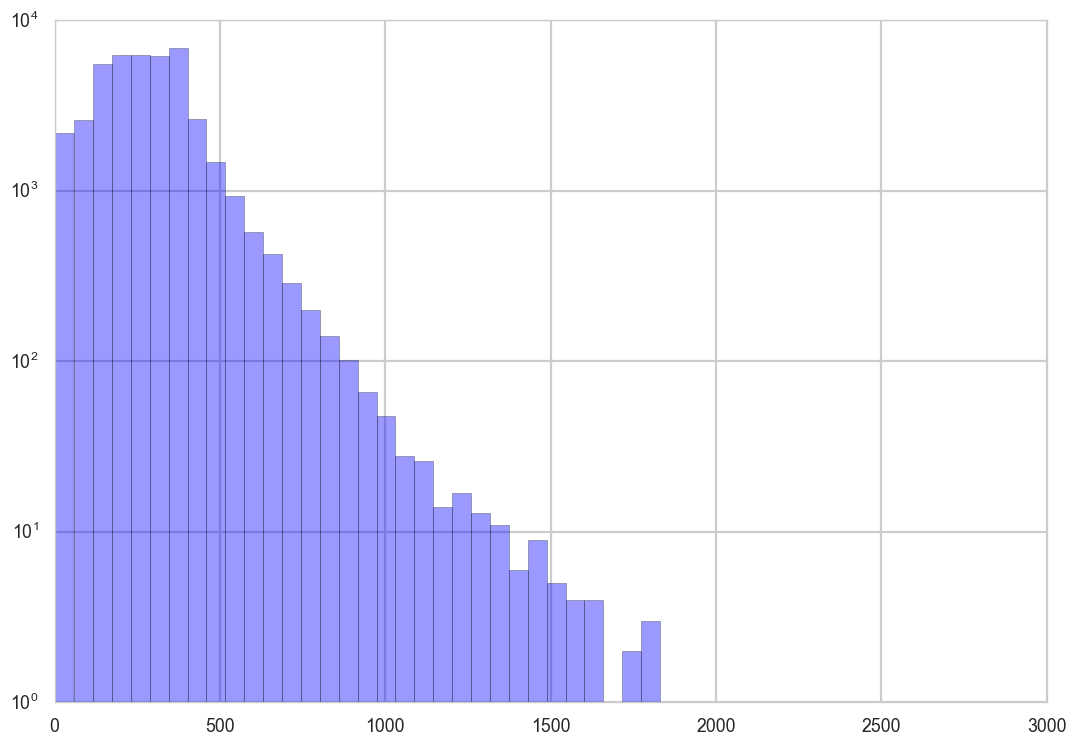

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
plot = sns.distplot(fantom_df[['size']], kde=False, fit=None, color='b')
plot.set_yscale('log')
#sns.distplot(fantom_shuffled_df[['size']], kde=False, fit=None)



In [16]:
np.logspace(1, 4, 50)

array([    10.        ,     11.51395399,     13.25711366,     15.26417967,
           17.57510625,     20.23589648,     23.29951811,     26.82695795,
           30.88843596,     35.56480306,     40.94915062,     47.14866363,
           54.28675439,     62.50551925,     71.9685673 ,     82.86427729,
           95.40954763,    109.8541142 ,    126.48552169,    145.63484775,
          167.68329368,    193.06977289,    222.29964825,    255.95479227,
          294.70517026,    339.32217719,    390.69399371,    449.8432669 ,
          517.94746792,    596.36233166,    686.648845  ,    790.60432109,
          910.29817799,   1048.11313415,   1206.79264064,   1389.49549437,
         1599.85871961,   1842.06996933,   2120.95088792,   2442.05309455,
         2811.76869797,   3237.45754282,   3727.59372031,   4291.93426013,
         4941.71336132,   5689.86602902,   6551.2855686 ,   7543.12006335,
         8685.11373751,  10000.        ])

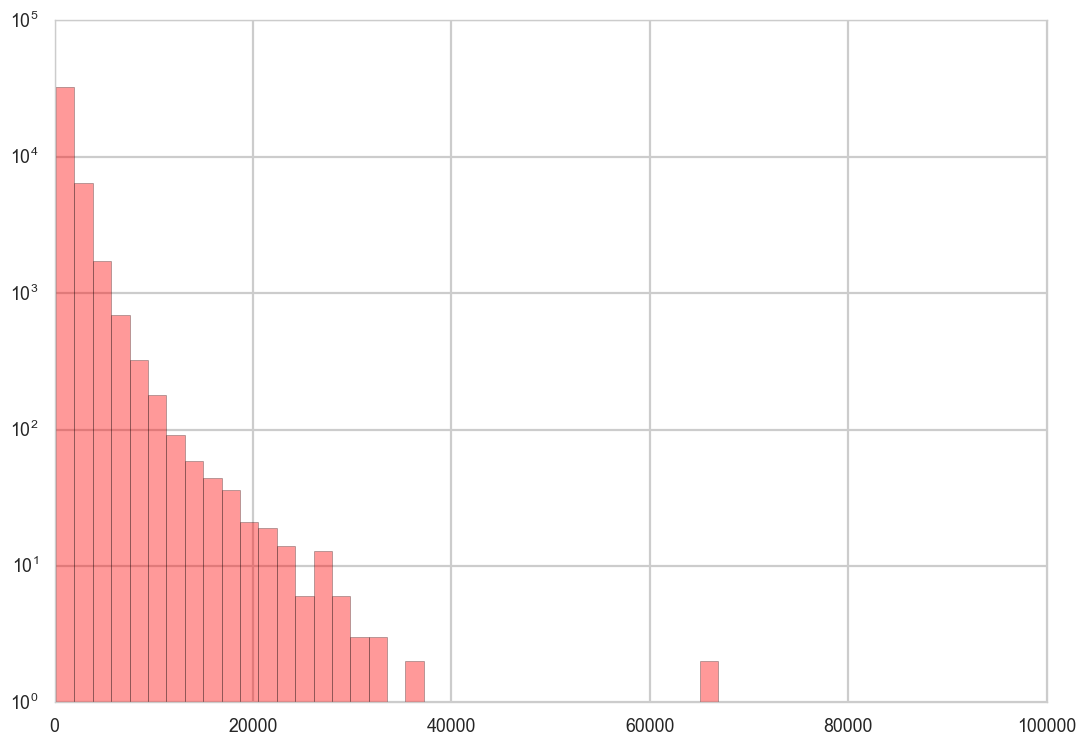

In [17]:
plot = sns.distplot(encode_df[['size']], kde=False, fit=None, color='r')

#plot = sns.distplot(encode_df[['size']], kde=False, fit=None, color='r', bins=np.logspace(1, 5, 50))
plot.set_yscale('log')
#plot.set_xscale('log')
# TODO try log binning

In [18]:
encode_bed_sorted.jaccard(fantom_shuffled_bed_sorted, f=0.50)

{'intersection': 13472,
 'jaccard': 0.000185028,
 'n_intersections': 71,
 'union-intersection': 72810651}

In [19]:
encode_bed_sorted.jaccard(encode_bed_sorted, f=0.50)

{'intersection': 60461879,
 'jaccard': 1.0,
 'n_intersections': 42001,
 'union-intersection': 60461879}

In [20]:
encode_bed_sorted.jaccard(fantom_bed_sorted, f=0.50)

{'intersection': 230499,
 'jaccard': 0.00317419,
 'n_intersections': 1000,
 'union-intersection': 72616569}

In [21]:
encode_bed_sorted.fisher(encode_bed_sorted, f=0.50, genome='hg19')

<FisherOutput at 4791072472>
# Number of query intervals: 42001
# Number of db intervals: 42001
# Number of overlaps: 42001
# Number of possible intervals (estimated): 1088888
# phyper(42001 - 1, 42001, 1088888 - 42001, 42001, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 42001        | 0            |
# not in -a | 0            | 1046887      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	0	0	inf

In [22]:
encode_bed_sorted.fisher(fantom_shuffled_bed_sorted, f=0.50, genome='hg19')

<FisherOutput at 4777697576>
# Number of query intervals: 42001
# Number of db intervals: 43011
# Number of overlaps: 74
# Number of possible intervals (estimated): 1813919
# phyper(74 - 1, 42001, 1813919 - 42001, 43011, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 74           | 41927        |
# not in -a | 42937        | 1728981      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	0.071

In [23]:
a = encode_bed_sorted.fisher(fantom_bed_sorted, f=0.50, genome='hg19')

In [24]:
a

<FisherOutput at 4726101160>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 1000
# Number of possible intervals (estimated): 1813917
# phyper(1000 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 1000         | 41001        |
# not in -a | 42010        | 1729906      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0.56134	0.45147	0.88391	1.004

In [25]:
import scipy.stats as stats
obs = [[1000, 41001], [42010, 1729906]]
oddsratio, pvalue = stats.fisher_exact(obs)
chi2 = stats.chi2_contingency(obs)
print("Fisher's oddsratio:", oddsratio, "pvalue:", pvalue)
print("Chi2:", chi2[0], "pvalue:", chi2[1])

Fisher's oddsratio: 1.00432754582 pvalue: 0.883911414896
Chi2: 0.0137163422923 pvalue: 0.906767505506


In [26]:
len(encode_bed_sorted)

42001

In [27]:
encode_bed_sorted.fisher(fantom_bed_sorted, f=0.10, genome='hg19')

<FisherOutput at 4650691720>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 4474
# Number of possible intervals (estimated): 1813917
# phyper(4474 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 4474         | 37527        |
# not in -a | 38536        | 1733380      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	5.363

In [28]:
sample_df = sample_bed.to_dataframe()
sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
int(round(sample_df[['size']].mean()))


150

In [29]:
len(sample_df)

4

## Fisher, Jaccard

In [42]:
def build_tests_df(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'fisher_left_p', 'fisher_right_p', 'fisher_two_p', 'fisher_oddsratio', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, samples_num):
        min_ovlp = i* 1/samples_num

        #fisher test
        fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        left_tail_fisher_pvalue = fisher.left_tail
        right_tail_fisher_pvalue = fisher.right_tail
        two_tail_fisher_pvalue = fisher.two_tail
        oddsratio_fisher = fisher.ratio

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
        jaccard_index = jaccard['jaccard']

        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, left_tail_fisher_pvalue, right_tail_fisher_pvalue, 
                     two_tail_fisher_pvalue, oddsratio_fisher, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df
    

In [43]:
base_encyclopedia = 'ENCODE'
biosample_name = 'T-cell'
overlapping_encyclopedia = 'FANTOM'


tests_df = build_tests_df(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'T-cell', 'hg19', 100)
tests_df_shuffled = build_tests_df(encode_bed_sorted, fantom_shuffled_bed_sorted, 'ENCODE', 'FANTOM_shuffled', 'T-cell', 'hg19', 100)
tests_df_random = build_tests_df(encode_bed_sorted, fantom_random_bed_sorted, 'ENCODE', 'FANTOM_random', 'T-cell', 'hg19', 100)

In [45]:
tests_df.T

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_name,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,...,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell
ovlp_encyclopedia,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,...,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM
encyclopedia_size,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001,...,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001
ovlp_encyclopedia_size,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011,...,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011
min_ovlp,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
ovlp_count,8633,8123,7511,6919,6398,5929,5491,5098,4767,4474,...,578,571,567,556,550,541,534,522,518,504
fisher_left_p,0,0,0,0,0,0,0,0,0,0,...,6.777e-49,1.2359e-50,1.2054e-51,1.7232e-54,4.4055e-56,1.5881e-58,1.7978e-60,6.6593e-64,4.4935e-65,2.7926e-69
fisher_right_p,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,0,0,0,0,0,0,0,0,0,0,...,1.3054e-48,2.6163e-50,2.2545e-51,3.2164e-54,8.6468e-56,3.4538e-58,3.675e-60,1.3098e-63,8.1683e-65,6.3957e-69


In [46]:
tests_df_random.T

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_name,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,...,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell,T-cell
ovlp_encyclopedia,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,...,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random
encyclopedia_size,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001,...,42001,42001,42001,42001,42001,42001,42001,42001,42001,42001
ovlp_encyclopedia_size,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011,...,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011
min_ovlp,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
ovlp_count,930,883,836,784,724,674,625,566,525,493,...,47,46,46,46,45,43,42,40,39,38
fisher_left_p,0.016225,0.00010372,5.5632e-08,5.8848e-13,1.3157e-20,1.1458e-28,3.6036e-38,6.7779e-52,4.9855e-63,1.0604e-72,...,0,0,0,0,0,0,0,0,0,0
fisher_right_p,0.98507,0.99991,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,0.032214,0.00020243,1.1095e-07,1.1455e-12,2.7466e-20,2.4918e-28,6.8814e-38,1.3503e-51,9.2091e-63,2.2956e-72,...,0,0,0,0,0,0,0,0,0,0


In [47]:
merged_tests_df = tests_df.append(tests_df_random).append(tests_df_shuffled)
merged_tests_df.reset_index(drop=True, inplace=True)
merged_tests_df['logp'] = -1*np.log(merged_tests_df['fisher_right_p'])

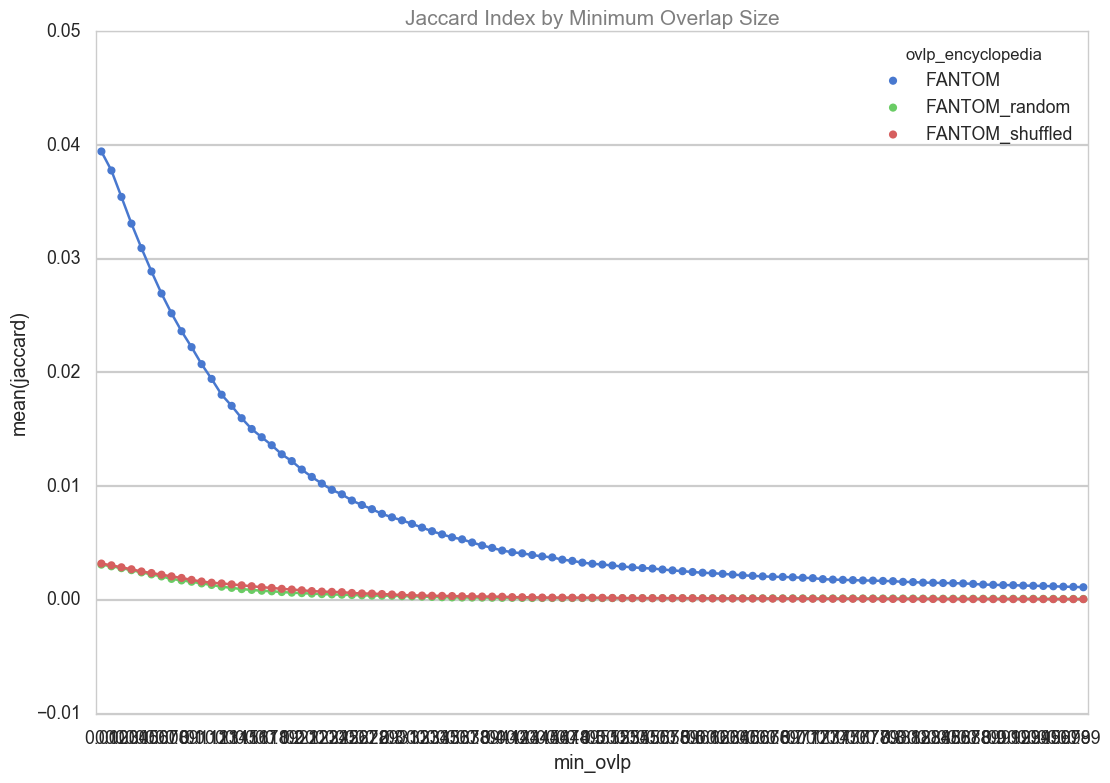

In [48]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)

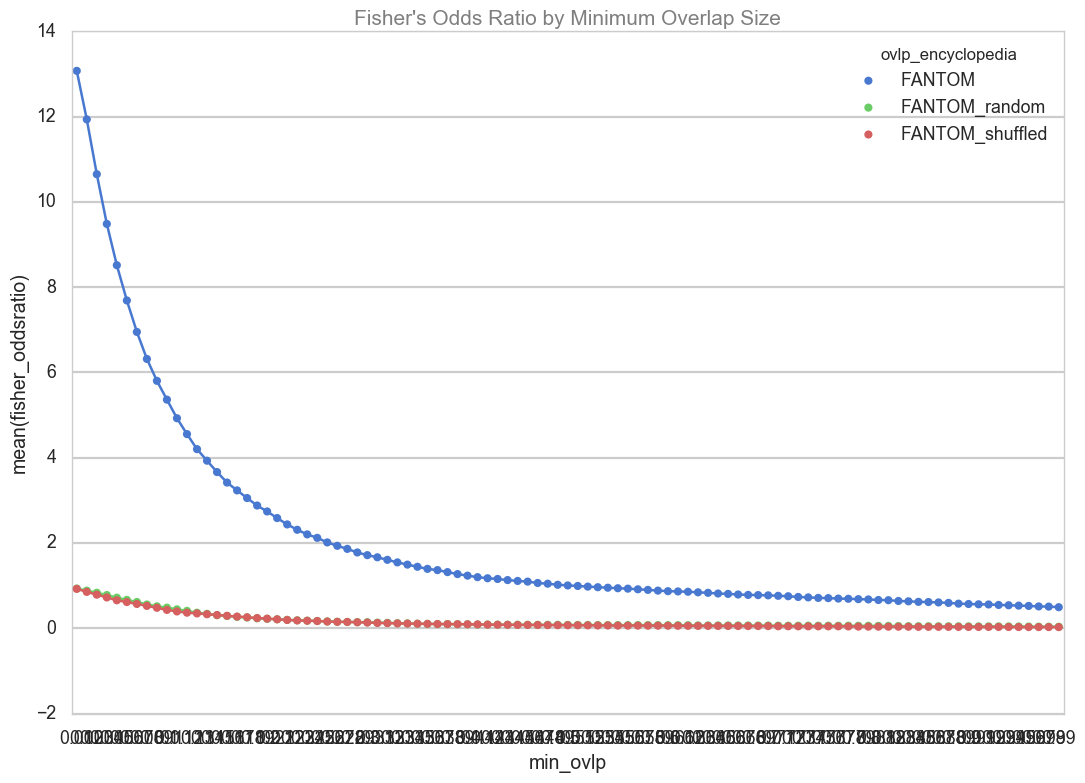

In [49]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_oddsratio", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Odds Ratio by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)

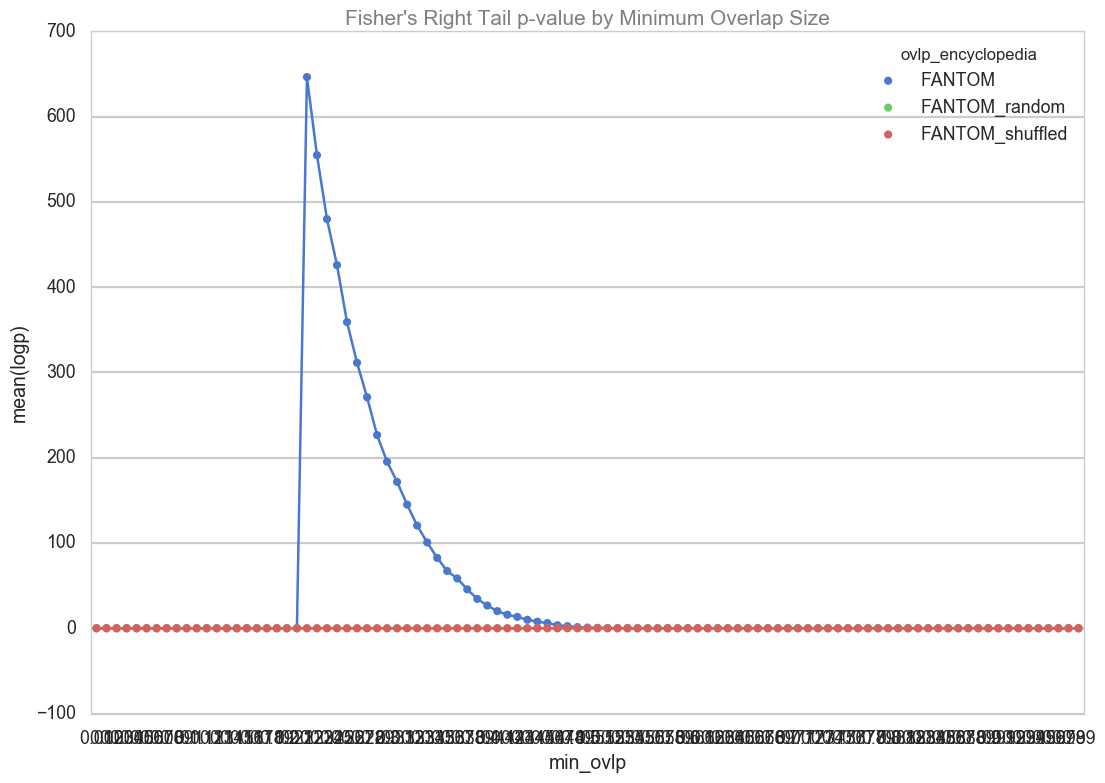

In [50]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="logp", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
#g.set_ylim(0, 200)
##TODO plottare -log(p-value)

(0.5, 98.5)

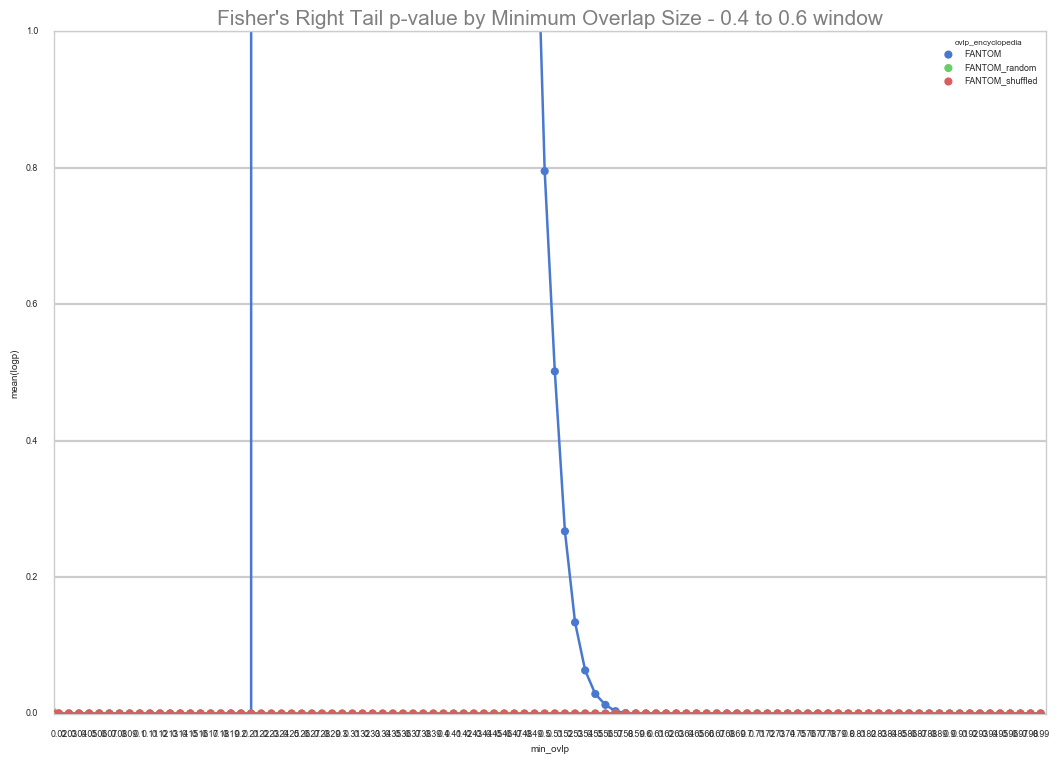

In [55]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.4, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="logp", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size - 0.4 to 0.6 window', fontsize=15,color="black",alpha=0.5)
g.set_ylim(0, 1)
g.set_xlim(0.5,)


## Relative Distance

In [32]:
import pandas as pd
df_reldist = pd.DataFrame(encode_bed_sorted.reldist(fantom_bed_sorted))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,3196.000,1642.000,1324.000,1143.000,1058.000,1068.000,1000.000,889.000,894.000,867.000,...,701.000,660.000,680.000,685.000,678.000,698.000,657.000,663.000,652.000,690.000
fraction,0.076,0.039,0.032,0.027,0.025,0.025,0.024,0.021,0.021,0.021,...,0.017,0.016,0.016,0.016,0.016,0.017,0.016,0.016,0.016,0.016
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.090,...,0.400,0.410,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490
total,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,...,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000,41927.000


In [33]:
df_reldist_random = pd.DataFrame(encode_bed_sorted.reldist(fantom_shuffled_bed_sorted))
df_reldist_random = df_reldist_random[0:50]

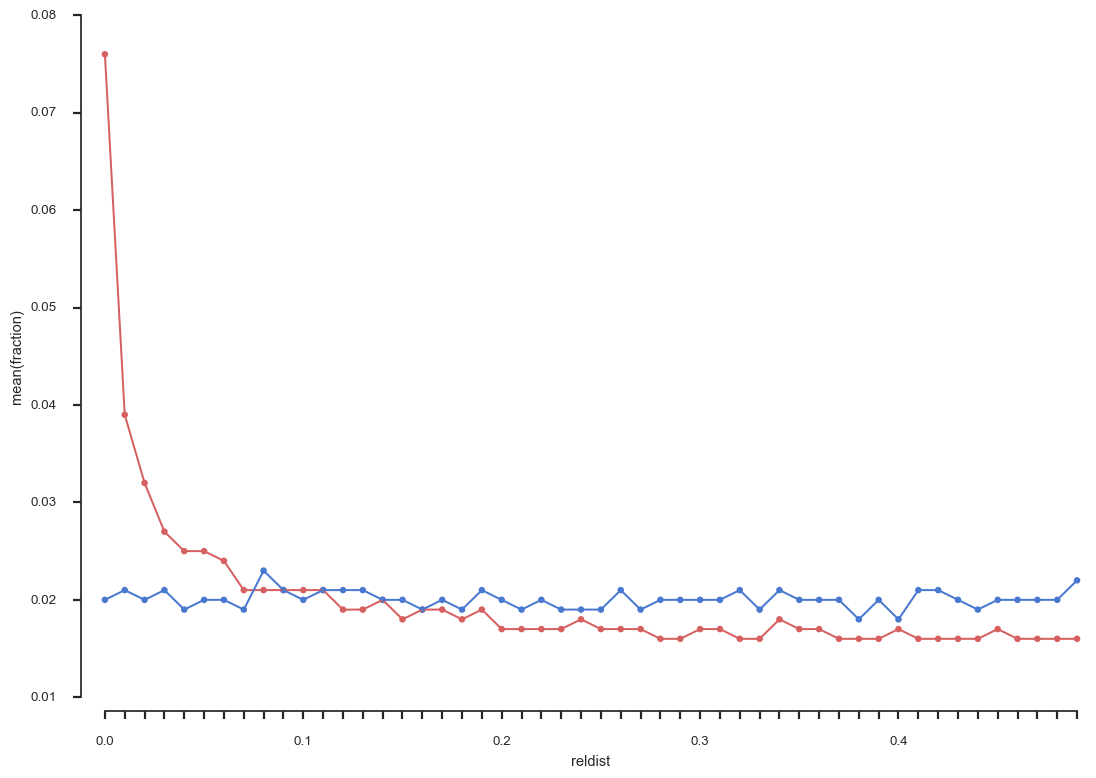

In [34]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist,  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random, color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        


## t test

In [35]:
import datetime

class Timer(object):
    """A simple timer class"""
    
    def __init__(self):
        pass
    
    def start(self):
        """Starts the timer"""
        self.start = datetime.datetime.now()
        return self.start
    
    def stop(self, message="Total: "):
        """Stops the timer.  Returns the time elapsed"""
        self.stop = datetime.datetime.now()
        return message + str(self.stop - self.start)
    
    def now(self, message="Now: "):
        """Returns the current time with a message"""
        return message + ": " + str(datetime.datetime.now())
    
    def elapsed(self, message="Elapsed: "):
        """Time elapsed since start was called"""
        return message + str(datetime.datetime.now() - self.start)
    
    def split(self, message="Split started at: "):
        """Start a split timer"""
        self.split_start = datetime.datetime.now()
        return message + str(self.split_start)
    
    def unsplit(self, message="Unsplit: "):
        """Stops a split. Returns the time elapsed since split was called"""
        return message + str(datetime.datetime.now() - self.split_start)

In [36]:
real_size = float(encode_bed.intersect(fantom_bed, f=0.8).count())
real_size

684.0

In [41]:
# create random sequence and overlap n times and compute a statistics
def create_random_overlap_distribution(bed, bed_overlap_with, assembly, min_overlap, samples_num, strategy='random'):  
    columns = ['sample_num', 'size']
    tests_df = pd.DataFrame(columns=columns)
    for i in range(0, samples_num):
        
        if strategy == 'shuffle':
            random_bed = bed_overlap_with.shuffle(genome=assembly, chrom=False)
            
        else:
            empty_bed = BedTool()
            random_bed = empty_bed.random(l=mean_size(bed_overlap_with), n=bed_overlap_with.count(), 
                                      genome=assembly)
            
        row_array = [i, bed.intersect(random_bed, f=min_overlap).count()]
        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)
    return tests_df

def test_random_overlap(bed, bed_overlap_with, assembly, min_overlap, samples_num): 
    for i in range(0, samples_num):
        empty_bed = BedTool()
        random_bed = empty_bed.random(l=mean_size(bed_overlap_with), n=bed_overlap_with.count(), 
                                      genome=assembly)

In [42]:
timer = Timer()
timer.start()
test_random_overlap(encode_bed, fantom_bed, 'hg19', 0.5, 20)
timer.elapsed()

'Elapsed: 0:00:39.828927'

In [43]:
timer = Timer()
timer.start()
create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.5, 100)
timer.elapsed()

'Elapsed: 0:00:42.277809'

In [44]:
timer = Timer()
timer.start()
runs_df = create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.5, 1000)
timer.elapsed()

'Elapsed: 0:35:18.009327'

In [45]:
timer = Timer()
timer.start()
runs_shuffled_df = create_random_overlap_distribution(encode_bed, fantom_bed, 'hg19', 0.5, 1000, 'shuffle')
timer.elapsed()

'Elapsed: 0:07:24.829606'

In [46]:
runs_df.T

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,990.0,991.0,992.0,993.0,994.0,995.0,996.0,997.0,998.0,999.0
size,68.0,71.0,78.0,61.0,67.0,72.0,75.0,69.0,77.0,71.0,...,82.0,76.0,62.0,64.0,84.0,64.0,74.0,83.0,68.0,82.0


In [47]:
random_mean_size = float(runs_df[['size']].mean())
random_std = float(runs_df[['size']].std())
shuffled_mean_size = float(runs_shuffled_df[['size']].mean())
shuffled_std = float(runs_shuffled_df[['size']].std())


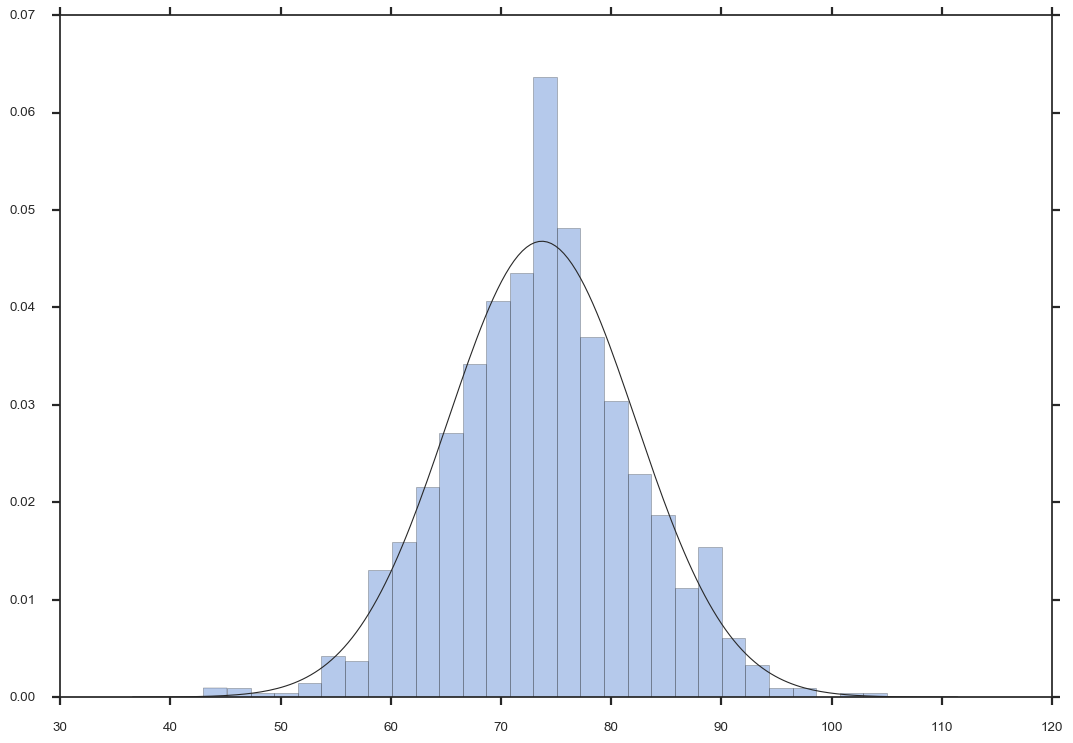

In [48]:
#sns.distplot(runs_df[['size']])
sns.distplot(runs_df[['size']], kde=False, fit=stats.norm)

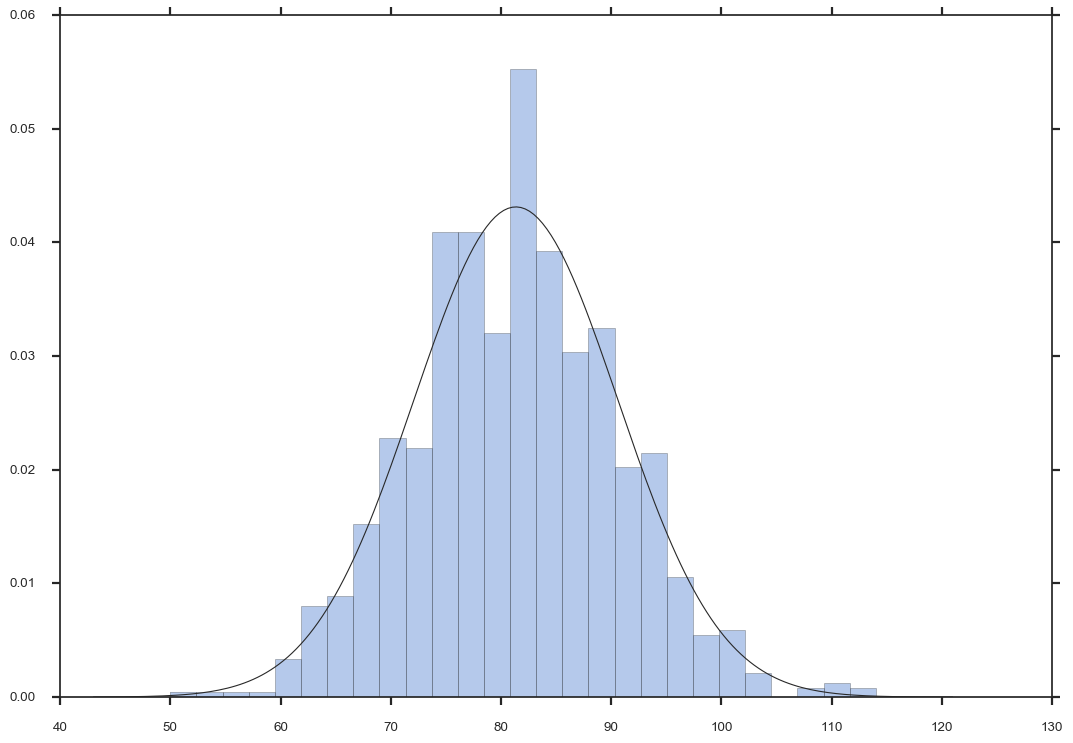

In [49]:
sns.distplot(runs_shuffled_df[['size']], kde=False, fit=stats.norm)

In [50]:
z = (real_size - random_mean_size) / random_std
z_shuffled = (real_size - shuffled_mean_size) / shuffled_std

In [51]:
print("z from random:", z, "z from shuffled:", z_shuffled)

z from random: 71.54222407403147 z from shuffled: 65.1148046305592


In [68]:
print("real size:", real_size, "random mean:", random_mean_size, "shuffled mean:", shuffled_mean_size)

real size: 684.0 random mean: 73.707 shuffled mean: 81.349


In [66]:
from scipy import stats
t, pvalue = stats.ttest_1samp(runs_df[['size']], 80)
print("t:",t, "pvalue:", pvalue)

t: [-23.32822956] pvalue: [  1.96230442e-96]


In [73]:
from scipy import stats
t, pvalue = stats.ttest_1samp(runs_shuffled_df[['size']], random_mean_size)
print("t:",t, "pvalue:", pvalue)

t: [ 26.11084301] pvalue: [  5.47180521e-115]


In [87]:
def compute_z(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'z_random', 'z_shuffled', 'fisher_right_p', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, 10):
        min_ovlp = i*0.1
       
        #fisher test
        fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        right_tail_fisher_pvalue = fisher.right_tail

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
        jaccard_index = jaccard['jaccard']
        
        # z test
        runs_shuffled_df = create_random_overlap_distribution(
            bed, bed_overlap_with, assembly, min_ovlp, samples_num, 'shuffle')
        runs_random_df = create_random_overlap_distribution(
            bed, bed_overlap_with, assembly, min_ovlp, samples_num)
        
        random_mean_count = float(runs_random_df[['size']].mean())
        random_std = float(runs_random_df[['size']].std())
        shuffled_mean_count = float(runs_shuffled_df[['size']].mean())
        shuffled_std = float(runs_shuffled_df[['size']].std())

        z_random = (overlaps_count - random_mean_count) / random_std
        z_shuffled = (overlaps_count - shuffled_mean_count) / shuffled_std
    
        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, z_random, z_shuffled, right_tail_fisher_pvalue, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df
    

In [102]:
# need to parallelize!!!
timer = Timer()
timer.start()
test_z_df = compute_z(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'T-cell', 'hg19', 100)
timer.elapsed()

'Elapsed: 0:38:44.684550'

In [106]:
test_z_df['log_z_random'] = np.log(test_z_df['z_random'])
test_z_df['log_z_shuffled'] = np.log(test_z_df['z_shuffled'])
test_z_df

,encyclopedia,biosample_name,ovlp_encyclopedia,encyclopedia_size,ovlp_encyclopedia_size,min_ovlp,ovlp_count,z_random,z_shuffled,fisher_right_p,jaccard,log_z_random,log_z_shuffled
0,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.1,4474.0,175.199039,198.647278,1.000000e+00,0.022231,5.165923,5.291531
1,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.2,2529.0,144.422204,144.818571,1.000000e+00,0.012206,4.972741,4.975482
2,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.3,1654.0,165.349755,117.389125,1.495200e-85,0.007260,5.108063,4.765494
3,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.4,1216.0,124.852133,112.341604,2.565700e-12,0.004569,4.827130,4.721544
4,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.5,1000.0,98.182638,96.815548,4.514700e-01,0.003174,4.586829,4.572808
5,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.6,872.0,104.161420,99.363039,9.999800e-01,0.002448,4.645942,4.598780
6,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.7,777.0,94.118765,94.088537,1.000000e+00,0.001987,4.544557,4.544236
7,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.8,684.0,89.704450,103.648323,1.000000e+00,0.001643,4.496520,4.641004
8,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.9,578.0,89.411315,76.069150,1.000000e+00,0.001320,4.493247,4.331643


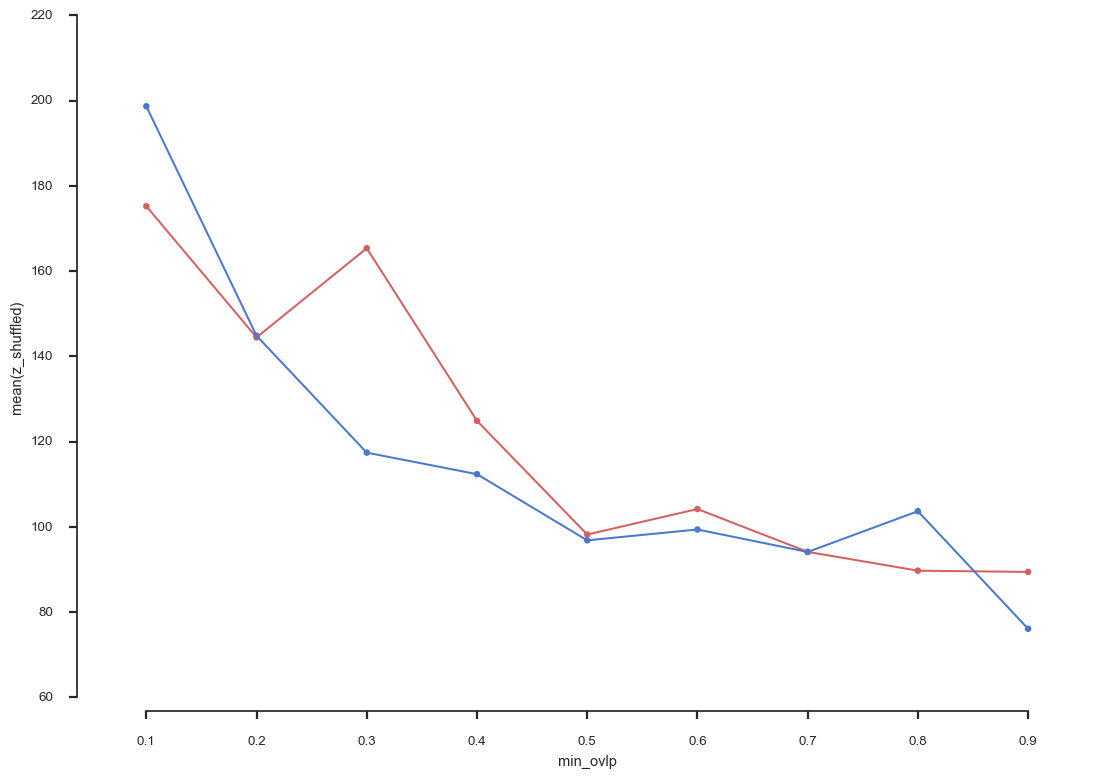

In [105]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='min_ovlp', y='z_random', data=test_z_df,  color='r')
g2 = sns.pointplot(x='min_ovlp', y='z_shuffled', data=test_z_df, color='b')

sns.despine(offset=10, trim=True)

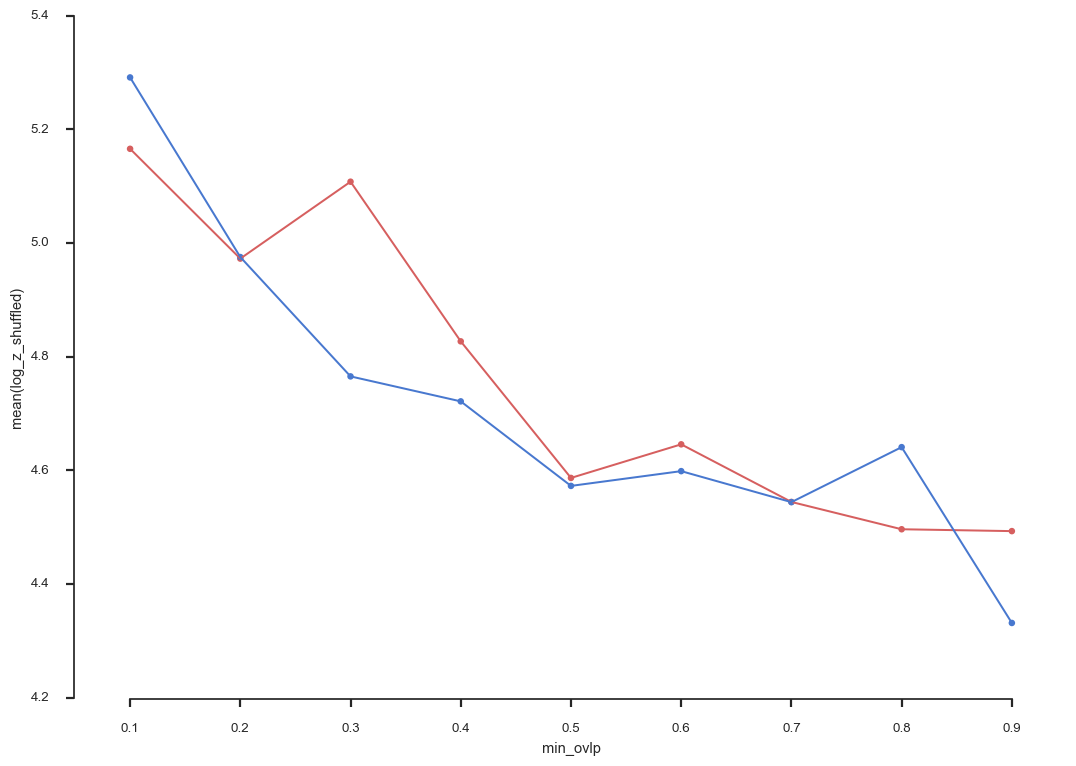

In [107]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='min_ovlp', y='log_z_random', data=test_z_df,  color='r')
g2 = sns.pointplot(x='min_ovlp', y='log_z_shuffled', data=test_z_df, color='b')

sns.despine(offset=1, trim=True)